# Fragrance cluster analysis

# Table of contents

1. Data exploration
2. Choosing the right number of clusters
3. Four fragrance clusters
4. Six fragrance clusters

## 1. Data exploration

In [28]:
# import Python libraries
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# open the csv file
df = pd.read_csv('perfume.csv')
pd.options.display.max_columns = None
df.head()

,brand,title,date,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,clslove_female25under,clslove_male25under,clslove_female25older,clslove_male25older,clslike_female25under,clslike_male25under,clslike_female25older,clslike_male25older,clsdislike_female25under,clsdislike_male25under,clsdislike_female25older,clsdislike_male25older,clswinter_female25under,clswinter_male25under,clswinter_female25older,clswinter_male25older,clsspring_female25under,clsspring_male25under,clsspring_female25older,clsspring_male25older,clssummer_female25under,clssummer_male25under,clssummer_female25older,clssummer_male25older,clsautumn_female25under,clsautumn_male25under,clsautumn_female25older,clsautumn_male25older,clsday_female25under,clsday_male25under,clsday_female25older,clsday_male25older,clsnight_female25under,clsnight_male25under,clsnight_female25older,clsnight_male25older,Ihaveit,Ihadit,Iwantit,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,notes_10,notes_11,notes_12,notes_13,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,gender
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,"woody,earthy,animalic,amber,musky,balsamic",5.0,3,0,0,0,0,3,0,1,0,3,100,1,1,50,50,50,50,0,0,50,50,1,1,1,100,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,3.0,0.0,0.0,Top1Bulgarian Rose,Top2Bergamot,Top3Fruits,Top4Agarwood (Oud),Middle0Sandalwood,Middle1Agarwood (Oud),Middle2Cypriol Oil or Nagarmotha,Middle3Benzoin,Base0Amber,Base1Castoreum,Base2Civet,Base3Moss,Base4Agarwood (Oud),Base5Indian Oud,NaN,NaN,NaN,NaN,NaN,NaN,women
1,Ajmal,Aatifa Ajmal for women and men,2014,"fresh spicy,woody,musky,rose,amber",4.2,10,1,0,0,0,5,0,0,3,3,100,80,20,100,60,60,60,0,0,80,80,1,1,60,40,1,1,80,1,1,1,20,1,1,1,80,20,1,1,40,20,1,1,60,1,1,1,60,1,1,1,60,20,1,1,60,20,8.0,0.0,0.0,Top1Rose,Top2Cumin,Middle0Amber,Middle1Woody Notes,Base0Musk,Base1Amber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,"rose,woody,musky,oud,fruity",0.0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,3.0,Top1Rose,Top2Sandalwood,Top3Apple,Top4Agarwood (Oud),Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for w...,2010,"white floral,green,ozonic,fresh,animalic",0.0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,100,100,100,0,0,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,0.0,0.0,1.0,Top1Green Tea,Top2White Flowers,Top3Ozonic notes,Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,"woody,warm spicy,amber,balsamic,musky",0.0,2,0,0,0,0,2,0,2,0,0,1,1,1,100,100,100,100,0,0,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,0.0,0.0,2.0,Top1Amber,Top2Sandalwood,Top3Floral Notes,Top4Vetiver,Top5Saffron,Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women


In [3]:
# display all columns
my_list = list(df)
my_list

['brand',
 'title',
 'date',
 'accords',
 'rating_score',
 'votes',
 'longevity_poor',
 'longevity_weak',
 'longevity_moderate',
 'longevity_long',
 'longevity_very_long',
 'sillage_soft',
 'sillage_moderate',
 'sillage_heavy',
 'sillage_enormous',
 'clslove',
 'clslike',
 'clsdislike',
 'clswinter',
 'clsspring',
 'clssummer',
 'clsautumn',
 'clscold',
 'clshot',
 'clsday',
 'clsnight',
 'clslove_female25under',
 'clslove_male25under',
 'clslove_female25older',
 'clslove_male25older',
 'clslike_female25under',
 'clslike_male25under',
 'clslike_female25older',
 'clslike_male25older',
 'clsdislike_female25under',
 'clsdislike_male25under',
 'clsdislike_female25older',
 'clsdislike_male25older',
 'clswinter_female25under',
 'clswinter_male25under',
 'clswinter_female25older',
 'clswinter_male25older',
 'clsspring_female25under',
 'clsspring_male25under',
 'clsspring_female25older',
 'clsspring_male25older',
 'clssummer_female25under',
 'clssummer_male25under',
 'clssummer_female25older',

In [4]:
# select columns for further analysis
df1 = df[['brand', 'title', 'date', 'gender', 'accords']]

In [29]:
# basic characteristics
df1.describe()

,date
count,51212.000000
mean,1526.492775
std,867.219020
min,0.000000
25%,1900.000000
50%,2009.000000
75%,2015.000000
max,9459.000000


In [5]:
# find length of longest string in Pandas dataframe
df1['accords'].str.len().max()
# set column width in dataframe
pd.options.display.max_colwidth = 76

In [6]:
# show the first 5 rows
df1.head()

,brand,title,date,gender,accords
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky,balsamic"
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber"
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity"
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic"
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky"


In [7]:
# show the last 5 rows
df1.tail()

,brand,title,date,gender,accords
51207,Maitre-Parfumeur-et-Gantier,Oud Extravagant Maitre Parfumeur et Gantier for women and men,2018,women,"balsamic,oud,aromatic,fresh spicy,vanilla,smoky,Pictures"
51208,Como-Lake,Silenzio Como Lake for women and men,2018,women,"woody,musky,aromatic,amber,white floral,citrus,Pictures"
51209,Battistoni,Marte Red Planet Battistoni for men,0,NaN,"aromatic,green,citrus,woody,fresh spicy,amber,Pictures"
51210,12-Parfumeurs-Francais,Versailles 12 Parfumeurs Francais for women and men,2015,women,"warm spicy,woody,citrus,fruity,sweet"
51211,OPSObjects,Ops! Love OPSObjects for women,2015,women,"floral,citrus,fresh,aromatic,patchouli,musky,Pictures"


In [8]:
# group by gender
df1['gender'].value_counts()

women     39761
man         850
unisex      122
Name: gender, dtype: int64

In [9]:
# count all rows
df1['gender'].count()

40733

In [10]:
df1.loc[df1['brand']=='Chanel'].head()

,brand,title,date,gender,accords
1881,Chanel,Chance Parfum Chanel for women,2003,women,"powdery,white floral,vanilla,musky,floral"
3620,Chanel,Chance Eau Tendre Chanel for women,2010,women,"floral,fruity,citrus,sweet,fresh spicy,white floral,Videos,Pictures"
3623,Chanel,Chance Eau de Toilette Chanel for women,2003,women,"patchouli,green,citrus,sweet,earthy,musky"
3635,Chanel,Chanel N°5 Eau Premiere Chanel for women,2007,women,"woody,aldehydic,white floral,yellow floral,vanilla,Videos,Pictures"
3642,Chanel,Allure Homme Edition Blanche Chanel for men,2008,NaN,"citrus,aromatic,woody,green,vanilla,Pictures"


In [11]:
# display top 20 brands
df1['brand'].value_counts().head(10)

Avon                 786
Guerlain             395
Zara                 331
Demeter-Fragrance    329
Victoria-s-Secret    314
O-Botic-rio          297
Oriflame             290
Natura               275
DSH-Perfumes         264
Ajmal                243
Name: brand, dtype: int64

## 2. Choosing the right number of clusters

A fragrance is a combination of two or more fragrance notes. 

In the dataset a fragrance is defined by five top fragrance notes presented in the 'accords' column. 

In [12]:
# vectorize the text - convert the string to numeric
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df1['accords'].values.astype('U'))

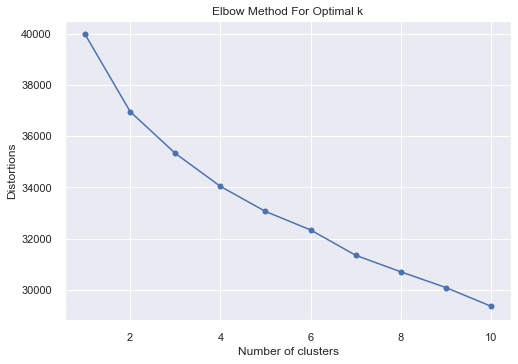

In [13]:
# elbow method for optimal number of clusters
# the scoring parameter metric is set to distortion
# distortion computes the sum of squared distances from each point to its assigned center
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

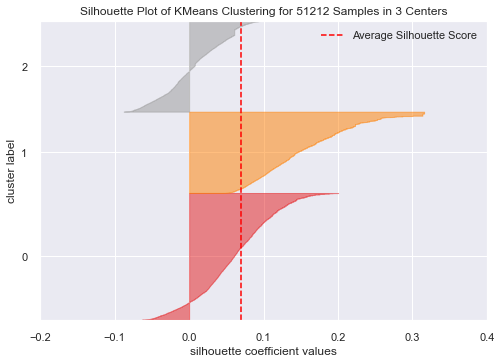

In [30]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

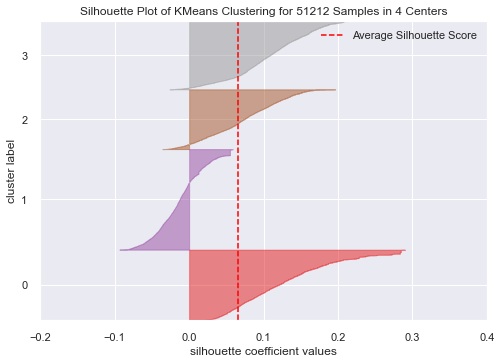

In [31]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();  

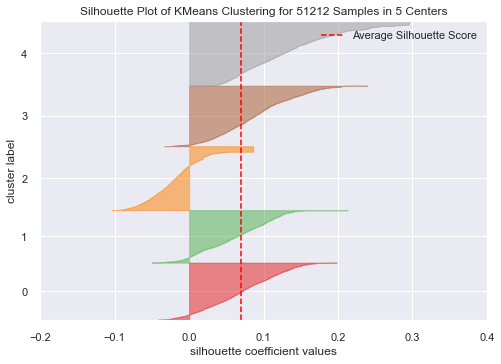

In [32]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();

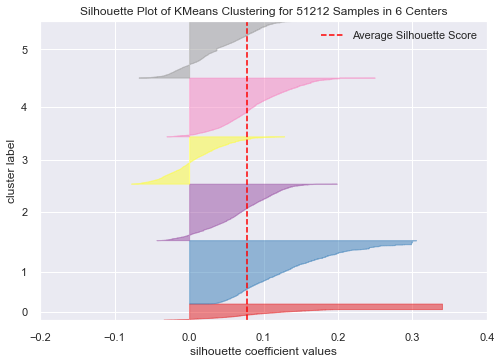

In [33]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof(); 

## 3. Four fragrance clusters

In [17]:
# cluster fragrances
model = KMeans(n_clusters=4, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

KMeans(max_iter=200, n_clusters=4)

Typically, fragrances are categorized into four main families:
1. Floral;
2. Oriental;
3. Woody; 
4. Fresh.

In [18]:
# print top terms per cluster
print('Top terms per cluster:')

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(0,4):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :9]:
        print(' %s' % terms[ind], end='')
    print() 

Top terms per cluster:
Cluster 0: animalic floral white amber leather pictures tuberose musky woody
Cluster 1: earthy woody aromatic spicy green patchouli pictures warm fresh
Cluster 2: fruity sweet floral pictures citrus woody vanilla fresh tropical
Cluster 3: fresh aromatic spicy green citrus woody pictures floral musky


Cluster 0 corresponds with the Oriental family <br>
Cluster 1 corresponds with the Woody family <br>
Cluster 2 corresponds with the Floral family <br>
Cluster 3 corresponds with the Fresh family <br>

In [19]:
# add a column with the cluster assignment
df2=df1.copy()
df2['cluster'] = model.labels_
df2.head(10)

,brand,title,date,gender,accords,cluster
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky,balsamic",2
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber",2
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity",2
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic",3
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky",1
5,Xyrena,Aaliyah Xyrena for women and men,2015,women,"powdery,fresh spicy,aromatic,woody,leather,floral,Pictures",0
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,women,"white floral,rose,oud,soft spicy,fresh spicy",1
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,women,"woody,aromatic,fresh spicy,green,fresh",0
8,Blackbird,Targa Blackbird for women and men,2015,women,"balsamic,woody,smoky,fresh spicy,warm spicy",1
9,Blackbird,Broken Glass Blackbird for women and men,2015,women,"herbal,aromatic,musky,fresh spicy,warm spicy",1


In [20]:
# ordinal features mapping
cluster_mapping = {
    0: 'Oriental',
    1: 'Woody',
    2: 'Floral',
    3: 'Fresh'}

df2['cluster_name'] = df2['cluster'].map(cluster_mapping)
df2.head(15)

,brand,title,date,gender,accords,cluster,cluster_name
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky,balsamic",2,Floral
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber",2,Floral
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity",2,Floral
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic",3,Fresh
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky",1,Woody
5,Xyrena,Aaliyah Xyrena for women and men,2015,women,"powdery,fresh spicy,aromatic,woody,leather,floral,Pictures",0,Oriental
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,women,"white floral,rose,oud,soft spicy,fresh spicy",1,Woody
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,women,"woody,aromatic,fresh spicy,green,fresh",0,Oriental
8,Blackbird,Targa Blackbird for women and men,2015,women,"balsamic,woody,smoky,fresh spicy,warm spicy",1,Woody
9,Blackbird,Broken Glass Blackbird for women and men,2015,women,"herbal,aromatic,musky,fresh spicy,warm spicy",1,Woody


In [21]:
# cluster count
df2['cluster'].value_counts()

2    17072
3    11737
0    11687
1    10716
Name: cluster, dtype: int64

Cluster 0 - Oriental <br>
Cluster 1 - Woody <br>
Cluster 2 - Floral <br>
Cluster 3 - Fresh <br>

In [27]:
df2.loc[df2['brand']=='Chanel'].head(15)

,brand,title,date,gender,accords,cluster,cluster_name
1881,Chanel,Chance Parfum Chanel for women,2003,women,"powdery,white floral,vanilla,musky,floral",3,Fresh
3620,Chanel,Chance Eau Tendre Chanel for women,2010,women,"floral,fruity,citrus,sweet,fresh spicy,white floral,Videos,Pictures",3,Fresh
3623,Chanel,Chance Eau de Toilette Chanel for women,2003,women,"patchouli,green,citrus,sweet,earthy,musky",2,Floral
3635,Chanel,Chanel N°5 Eau Premiere Chanel for women,2007,women,"woody,aldehydic,white floral,yellow floral,vanilla,Videos,Pictures",3,Fresh
3642,Chanel,Allure Homme Edition Blanche Chanel for men,2008,NaN,"citrus,aromatic,woody,green,vanilla,Pictures",0,Oriental
3656,Chanel,Allure Homme Sport Eau Extreme Chanel for men,1999,NaN,"aromatic,balsamic,woody,fresh spicy,green,citrus,Videos,Pictures",0,Oriental
3660,Chanel,Chanel No 19 Poudre Chanel for women,2011,women,"woody,green,aromatic,powdery,floral,Pictures",0,Oriental
3696,Chanel,Gabrielle Chanel for women,2017,women,"citrus,white floral,woody,sweet,yellow floral,musky,Videos,Pictures",3,Fresh
3704,Chanel,Coco Mademoiselle Parfum Chanel for women,1978,women,"citrus,patchouli,rose,vanilla,white floral,earthy,Pictures",3,Fresh
3718,Chanel,Chanel No 5 Eau Premiere (2015) Chanel for women,2007,women,"woody,aldehydic,white floral,yellow floral,vanilla,Videos,Pictures",3,Fresh


In [24]:
# TO DO LIST
# clean up the accords column -> remove nulls, Pictures, Videos
# run hierarchical clustering algorithm